<a href="https://colab.research.google.com/github/Yilder02/SyS_2024-II/blob/main/Copia_de_Parcial1_Corregido_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parcial 1: Señales y Sistemas 2024-II
#Profesor: Andrés Marino Álvarez Meza, Ph.D.
#Departamento de Ingeniería Eléctrica, Electrónica, y Computación
#Universidad Nacional de Colombia - sede Manizales
# Estudiante: Yilder Rafael Epiayu Gonzalez
# CC: 1006817066

#Pregunta 1 (valor 2.5 puntos):Proceso de digitalización incluyendo al menos 3 ciclos de la señal x(t)

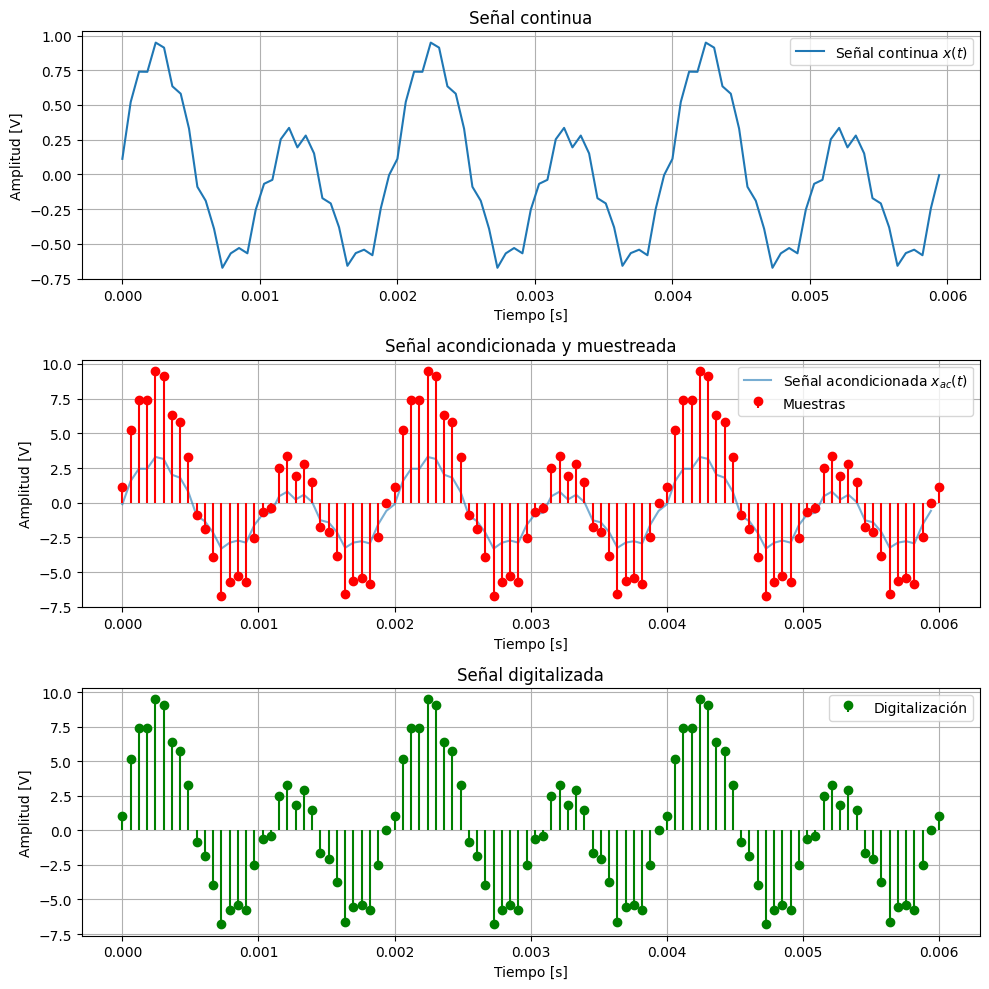

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
f1, f2, f3 = 500, 1000, 5500  # Frecuencias en Hz
A1, A2, A3 = 0.3, 0.6, 0.1    # Amplitudes
phi1, phi2, phi3 = -np.pi/4, 0, -np.pi  # Fases

T1 = 1/f1 #periodo 1
T2 = 1/f2 #periodo 2
T3 = 1/f3 #periodo 3

T = (1/500)#periodo de la señal cuasiperiodica

Fs = 3*max(f1,f2,f3)
Ts = 1/Fs
# Tiempo continuo
#definimos el vector tiempo
ti = 0 #empezamos en 0
tf = 3*T #3 periodos hacia delante

tv = np.arange(ti,tf,Ts) #tiempo de muestreo

# Señal continua x(t)
x_t = (A1 * np.cos(2 * np.pi * f1 * tv + phi1) +
       A2 * np.sin(2 * np.pi * f2 * tv + phi2) +
       A3 * np.cos(2 * np.pi * f3 * tv + phi3))


#Acondicionamiento:funcion del cero y pendiente
def my_ceropen(x,ymin, ymax):
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

ymin = -3.3
ymax = 3.3
xcp = my_ceropen(x_t, ymin, ymax)

# Muestreo(Discretizar)
num_muestras = 100 # Número de muestras deseado
t_dis = np.linspace(0, 3*T, num_muestras) # Vector de tiempo discreto con num_muestras puntos

k=10 #factor de escalamiento
x_dis = k * (A1 * np.cos(2 * np.pi * f1 * t_dis + phi1) +
                  A2 * np.sin(2 * np.pi * f2 * t_dis + phi2) +
                  A3 * np.cos(2 * np.pi * f3 * t_dis + phi3))

# Digitalización (cuantización)
N_bits = 5
N_levels = 2**N_bits
Delta = (ymax - ymin) / N_levels  # Paso de cuantización
x_dig = np.round((x_dis - ymin) / Delta) * Delta + ymin

# Gráfica
plt.figure(figsize=(10, 10))

# Señal continua
plt.subplot(3, 1, 1)
plt.plot(tv, x_t, label="Señal continua $x(t)$")
plt.title("Señal continua")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid()
plt.legend()

# Señal acondicionada y muestreada
plt.subplot(3, 1, 2)
plt.plot(tv, xcp, label="Señal acondicionada $x_{ac}(t)$", alpha=0.6)
plt.stem(t_dis, x_dis, linefmt='r-', markerfmt='ro', basefmt=" ", label="Muestras")
plt.title("Señal acondicionada y muestreada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid()
plt.legend()

# Señal digitalizada
plt.subplot(3, 1,3)
plt.stem(t_dis, x_dig, linefmt='g-', markerfmt='go', basefmt=" ", label="Digitalización")
plt.title("Señal digitalizada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


#Pregunta 2 (valor 2.5 puntos):Analizar y comprobar mediante simulaciones si el sistema cumple con las propiedades de linealidad e invariancia en el tiempo.

In [5]:
# cargar sistema
FILEID = "1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O P1_model.zip && rm -rf /tmp/cookies.txt
!unzip -o P1_model.zip
!dir

--2025-02-27 21:36:51--  https://docs.google.com/uc?export=download&confirm=&id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm
Resolving docs.google.com (docs.google.com)... 173.194.206.138, 173.194.206.113, 173.194.206.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.206.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download [following]
--2025-02-27 21:36:51--  https://drive.usercontent.google.com/download?id=1J9rhh0wWHZSBd8XmWGt1ZpCsMDuoUFmm&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.121.132, 2607:f8b0:4001:c19::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.121.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 732 [application/octet-stream]
Saving to: ‘P1_model.zip’

P1_model.zip        100%[===================>]     732  --.-KB/s   

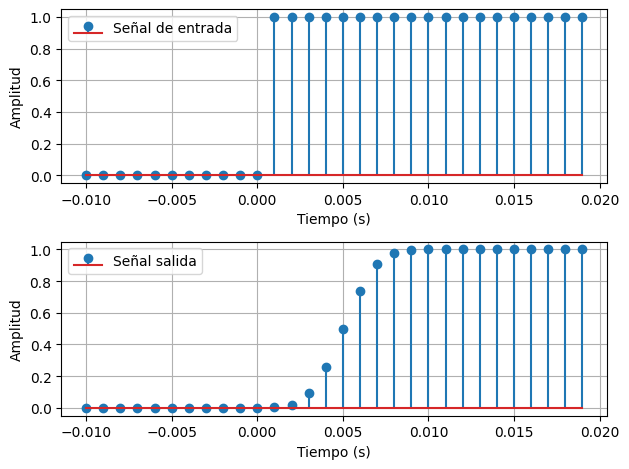

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import joblib
from P1_model import system_
from scipy.signal import firwin, freqz, lfilter, filtfilt

#sistema pregunta 2
my_system = system_.My_System()
my_system.create_()
fs = my_system.fs #frecuencia de muestreo
t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo
signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()

# Verificar linealidad: superposicion y escalamiento(le relacion se rige por operaciones lineales).

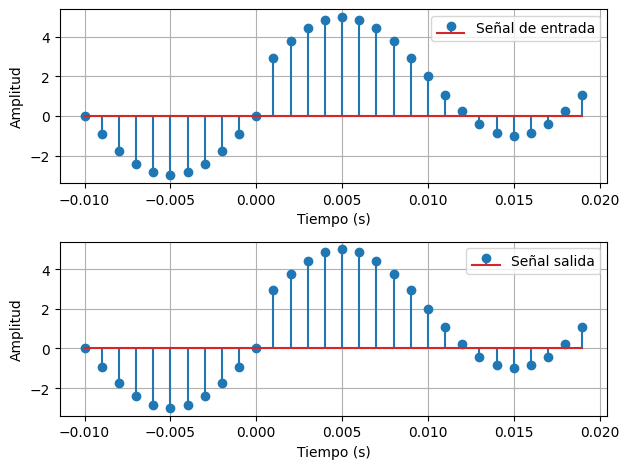

In [7]:
#Comprobar linelidad

t = np.arange(-0.01, 0.02, 1/fs)  # Tiempo

x1 = 2
x2 = 3

signal_u = np.heaviside(t,1) # función heaviside
y_u = my_system.predict(signal_u)

signal_v = np.sin(100 * np.pi * t) #funcion sen
y_v = my_system.predict(signal_v)

s1 = x1 * y_u  #señal 1 multiplicada por estacalar
s2 = x2 * y_v  #señal 2 multiplicada por estacalar

si = x1 * signal_u + x2 * signal_v #suma de las entradas
y_comb = my_system.predict(si)

sf = s1 + s2

# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, si, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,si, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()



#Verificar SLIT: se verifica si un desplazamiento en el tiempo de la entrada provoca un desplazamiento equivalente en la salida.

Comprueba si el sistema satisface la propiedad de invariancia en el tiempo, es decir:

$y_s(t)=y(t−t_0)$

* Desplaza temporalmente la señal de entrada.
* Calcula la salida del sistema para la señal desplazada.
* Compara si la salida desplazada es igual a la salida de la señal original desplazada.

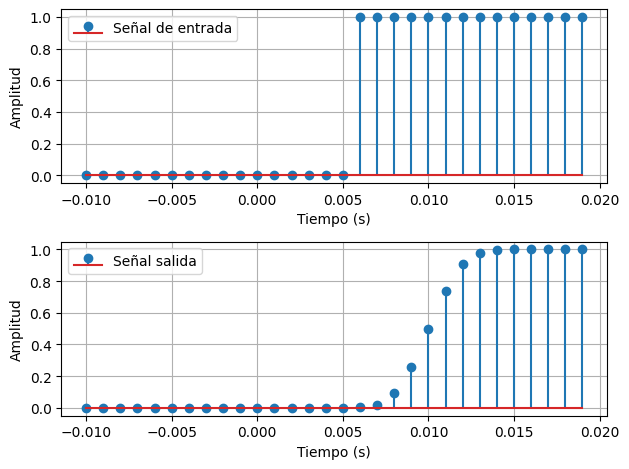

In [8]:
#Comprobar si es invariancia con el tiempo
to = 0.005
signal_u = np.heaviside(t - to,1) # función heaviside
y_u = my_system.predict(signal_u)


# Visualización de las señales
fig, axs = plt.subplots(2,1)
axs[0].stem(t, signal_u, label='Señal de entrada')
axs[0].set_xlabel('Tiempo (s)')
axs[0].set_ylabel('Amplitud')
axs[0].legend()
axs[0].grid()
axs[1].stem(t,y_u, label='Señal salida')
axs[1].set_xlabel('Tiempo (s)')
axs[1].set_ylabel('Amplitud')
axs[1].legend()
axs[1].grid()
plt.tight_layout()
plt.show()


#Se determina su respuesta al impulso y se utiliza esta respuesta para calcular la salida del sistema ante la siguiente señal: $x[n]=sin[100πn]+sin[600πn]$

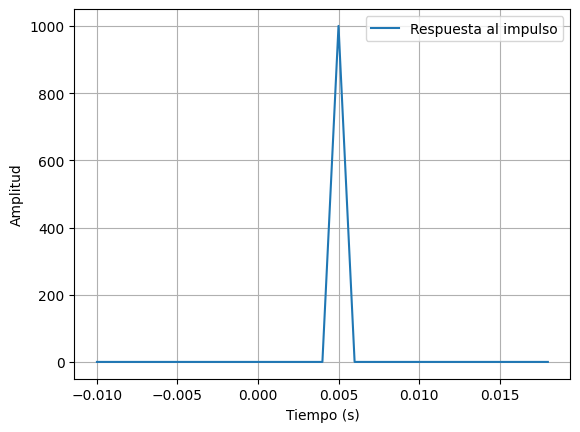

In [10]:
t_adjusted = t[:-1]
h_n = np.diff(signal_u) * fs  #encontramos la respuesta al impulso derivando la salida del sistema
plt.figure()

# Ajustamos el tamaño de t para que coincida con h_n
t_adjusted = t[:-1]  # Eliminamos el último elemento de t

plt.plot(t_adjusted, h_n, label='Respuesta al impulso')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()




#Entrada y salida del sistema ante la señal: $x[n]=sin[100πn]+sin[600πn]$

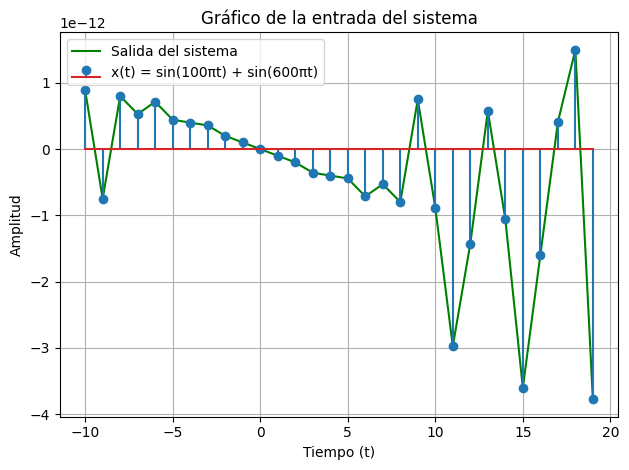

In [11]:
n = np.round(t*fs)
n

x_n = np.sin(100 * np.pi * n) + np.sin(600 * np.pi * n)
plt.plot(n, x_n, 'g', label='Salida del sistema')
plt.stem(n, x_n, label="x(t) = sin(100πt) + sin(600πt)")
plt.title("Gráfico de la entrada del sistema")
plt.xlabel("Tiempo (t)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

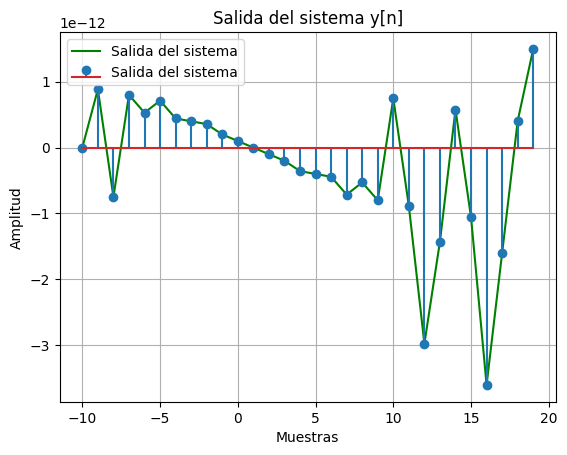

In [12]:
# Realizar la convolución
y_output = np.convolve(x_n, h_n, mode='same') / fs

# Visualización de la salida
plt.figure()
plt.plot(n, y_output, 'g', label='Salida del sistema')
plt.stem(n, y_output, label='Salida del sistema')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()
plt.title('Salida del sistema y[n]')
plt.show()

#PREGUNTAS O CONSULTAS A LA IA
* ¿Cómo se puede desplazar la señal en el tiempo para comprobar la invariancia temporal de un sistema en Python?
* ¿Cómo puedo verificar si un sistema es lineal y cumple con la propiedad de invarianza en el tiempo utilizando simulaciones?
* ¿Cómo ajusto el tamaño del gráfico para que se vea correctamente?
* ¿Cómo realizo la convolución de dos señales en Python?
* ¿Cómo uso la función convolve de NumPy para calcular la convolución de señales en Python?